In [107]:
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv('./pizza.csv')

In [109]:
data

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...,...,...
49569,49570,49570,2015-021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95
49570,49571,49571,2015-021348,2015-12-31,21:23:10,napolitana,S,classic,12.00
49571,49572,49572,2015-021348,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75
49572,49573,49573,2015-021349,2015-12-31,22:09:54,mexicana,L,veggie,20.25


In [110]:
data.drop(columns=['Unnamed: 0', 'X'], inplace=True)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49574 non-null  object 
 1   date    49574 non-null  object 
 2   time    49574 non-null  object 
 3   name    49574 non-null  object 
 4   size    49574 non-null  object 
 5   type    49574 non-null  object 
 6   price   49574 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.6+ MB


In [112]:
data['date'] = pd.to_datetime(data['date'])

In [113]:
data

,id,date,time,name,size,type,price
0,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...
49569,2015-021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95
49570,2015-021348,2015-12-31,21:23:10,napolitana,S,classic,12.00
49571,2015-021348,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75
49572,2015-021349,2015-12-31,22:09:54,mexicana,L,veggie,20.25


In [114]:
data['type'].value_counts()

type
classic    14888
supreme    11987
veggie     11649
chicken    11050
Name: count, dtype: int64

In [115]:
from collections import Counter

In [116]:
pizzas = data['name'].str.split(', ').explode()
contar_pizzas = Counter(pizzas)
top_pizzas = contar_pizzas.most_common(10)
df_top_pizzas = pd.DataFrame(top_pizzas, columns = ['pizzas', 'cantidad'])
df_top_pizzas

,pizzas,cantidad
0,classic_dlx,2453
1,bbq_ckn,2432
2,hawaiian,2422
3,pepperoni,2418
4,thai_ckn,2371
5,cali_ckn,2370
6,sicilian,1938
7,spicy_ital,1924
8,southw_ckn,1917
9,big_meat,1914


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'classic_dlx'),
  Text(1, 0, 'bbq_ckn'),
  Text(2, 0, 'hawaiian'),
  Text(3, 0, 'pepperoni'),
  Text(4, 0, 'thai_ckn'),
  Text(5, 0, 'cali_ckn'),
  Text(6, 0, 'sicilian'),
  Text(7, 0, 'spicy_ital'),
  Text(8, 0, 'southw_ckn'),
  Text(9, 0, 'big_meat')])

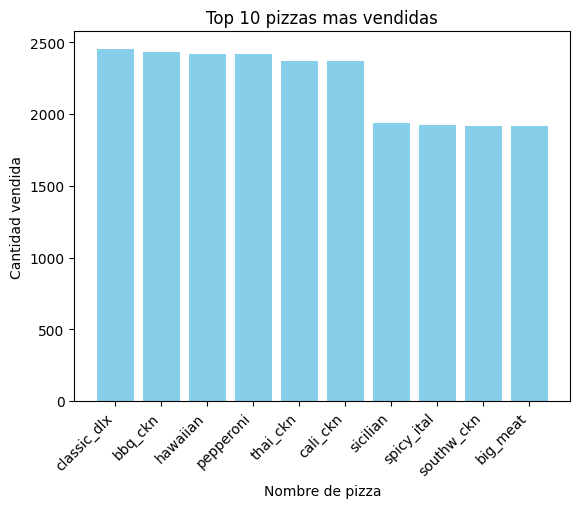

In [117]:
plt.title("Top 10 pizzas mas vendidas")
plt.bar(df_top_pizzas['pizzas'], df_top_pizzas['cantidad'], color = 'skyblue')
plt.xlabel('Nombre de pizza')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation = 45, ha = 'right')

In [118]:
tipo_pizza_mas_vendida = data['type'].str.split(', ').explode()
contar_tipo_pizza_mas_vendida = Counter(tipo_pizza_mas_vendida)
top_tipo_pizza_mas_vendida = contar_tipo_pizza_mas_vendida.most_common(10)
df_top_tipo_pizza_mas_vendida = pd.DataFrame(top_tipo_pizza_mas_vendida, columns = ['Tipo', 'Cantidad'])
df_top_tipo_pizza_mas_vendida

,Tipo,Cantidad
0,classic,14888
1,supreme,11987
2,veggie,11649
3,chicken,11050


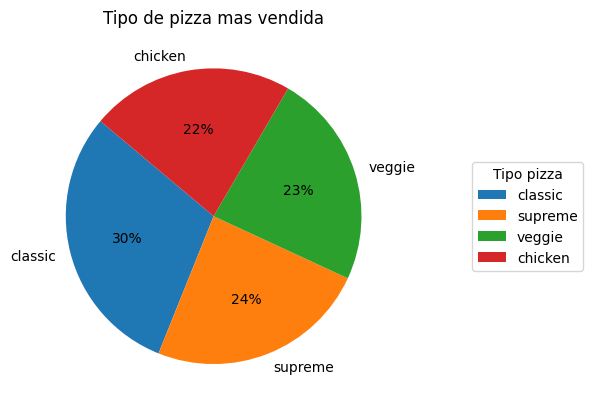

In [119]:
plt.title('Tipo de pizza mas vendida')
plt.pie(df_top_tipo_pizza_mas_vendida['Cantidad'], labels = df_top_tipo_pizza_mas_vendida['Tipo'], autopct='%1d%%', startangle=140)
plt.legend(df_top_tipo_pizza_mas_vendida['Tipo'], title="Tipo pizza", loc="center", bbox_to_anchor=(1.1, 0, 0.5, 1))

In [120]:
data.describe()

,date,price
count,49574,49574.000000
mean,2015-06-29 12:23:49.136240896,16.497762
min,2015-01-01 00:00:00,9.750000
25%,2015-03-31 00:00:00,12.750000
50%,2015-06-28 00:00:00,16.500000
75%,2015-09-28 00:00:00,20.250000
max,2015-12-31 00:00:00,35.950000
std,NaN,3.621954


#### Las 5 pizzas mas caras

In [121]:
precio_pizzas = data.groupby(['name', 'size'])['price'].mean().sort_values(ascending=False).reset_index()
precio_pizzas.head()

,name,size,price
0,the_greek,XXL,35.95
1,the_greek,XL,25.50
2,brie_carre,S,23.65
3,ital_veggie,L,21.00
4,bbq_ckn,L,20.75


#### Las 5 pizzas mas baratas

In [122]:
precio_pizzas.tail()

,name,size,price
86,mexicana,S,12.00
87,napolitana,S,12.00
88,pep_msh_pep,S,11.00
89,hawaiian,S,10.50
90,pepperoni,S,9.75


In [123]:
data['month'] = data['date'].dt.month

In [124]:
data

,id,date,time,name,size,type,price,month
0,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,1
1,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,1
2,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00,1
3,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,1
4,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50,1
...,...,...,...,...,...,...,...,...
49569,2015-021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95,12
49570,2015-021348,2015-12-31,21:23:10,napolitana,S,classic,12.00,12
49571,2015-021348,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75,12
49572,2015-021349,2015-12-31,22:09:54,mexicana,L,veggie,20.25,12


In [125]:
monthly_counts = data['month'].value_counts().sort_index()
monthly_counts

month
1     4232
2     3961
3     4261
4     4151
5     4328
6     4107
7     4392
8     4168
9     3890
10    3883
11    4266
12    3935
Name: count, dtype: int64

In [126]:
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}


In [127]:
monthly_counts.index = monthly_counts.index.map(month_map)

In [142]:
total_ventas_mensuales = pd.DataFrame(monthly_counts.reset_index())

,month,count
0,January,4232
1,February,3961
2,March,4261
3,April,4151
4,May,4328
5,June,4107
6,July,4392
7,August,4168
8,September,3890
9,October,3883


Text(0, 0.5, 'Ventas')

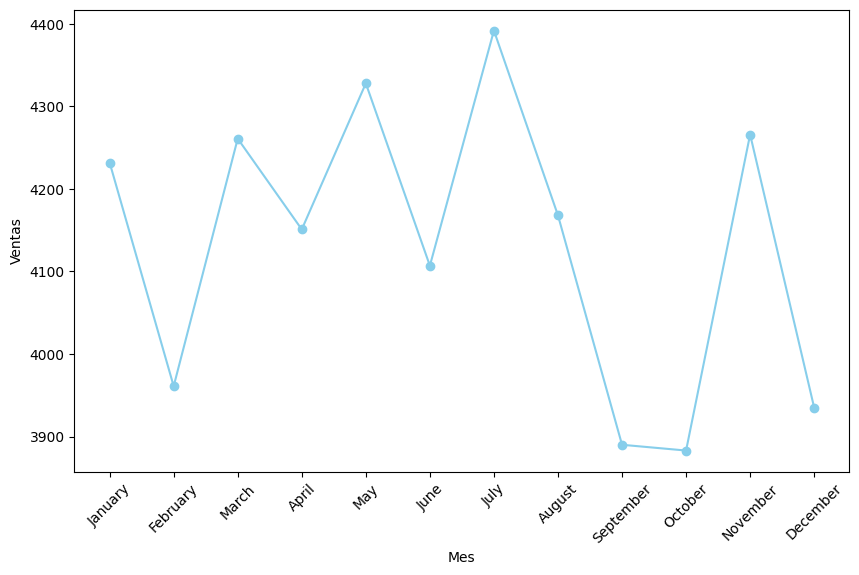

In [138]:
plt.figure(figsize=(10,6))
plt.plot(monthly_counts.index, monthly_counts.values, marker = 'o', color = 'skyblue')
plt.xticks(rotation = 45)
plt.xlabel("Mes")
plt.ylabel("Ventas")

In [145]:
# Usar pandas.ExcelWriter para escribir varios DataFrames en un solo archivo Excel
with pd.ExcelWriter('multiple_dataframes.xlsx') as writer:
    total_ventas_mensuales.to_excel(writer, sheet_name='Total ventas mensuales', index=False)
    data.to_excel(writer, sheet_name='Data total', index=False)
    precio_pizzas.to_excel(writer, sheet_name='precio de las pizzas', index=False)
    df_top_pizzas.to_excel(writer, sheet_name='top pizzas mas vendidas', index=False)
    df_top_tipo_pizza_mas_vendida.to_excel(writer, sheet_name='top tipo pizza mas vendida', index=False)

print("DataFrames exportados exitosamente a multiple_dataframes.xlsx")

DataFrames exportados exitosamente a multiple_dataframes.xlsx
